## Tugas 5
### Nama    : Hernan Sandi Laksono
### NIM     : 24060121130078
### Dataset : Image Segmentation
### Link Dataset : https://archive.ics.uci.edu/dataset/50/image+segmentation

## Penjelasan
### Import Modul / Library
#### pandas untuk menangani dataset dalam format DataFrame.
#### matplotlib.pyplot untuk membuat visualisasi.
#### StandardScaler dari scikit-learn untuk standarisasi nilai fitur.
#### PCA dari scikit-learn untuk Analisis Komponen Utama.
#### seaborn untuk visualisasi data statistik.

### Load Dataset
#### memuat dataset dari URL dataset image segmentation ke dalam DataFrame Pandas. Parameter names digunakan untuk menetapkan nama kolom ke DataFrame. Parameter skiprows=1 digunakan untuk melewati baris pertama karena berisi nama-nama kolom.



In [3]:
# Import Modul / Library
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Load Dataset
url = "https://archive.ics.uci.edu/static/public/50/data.csv"
df = pd.read_csv(url, names = ['class','region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vedge-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean'], skiprows=1)


## Penjelasan
### Data Preprocessing
### Kode ini memilih subset fitur dari DataFrame dan memisahkannya menjadi fitur (x) dan variabel target (y). Fitur kemudian distandarisasi menggunakan StandardScaler.


In [4]:
# Data Preprocessing

features = ['region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vedge-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean']
## separating out the features
x = df.loc[:, features].values
## separating out the class
y = df.loc[:, ['class']].values
## Stadardizing the features
x = StandardScaler().fit_transform(x)

## Penjelasan
### PCA
####Analisis Komponen Utama diterapkan untuk mengurangi dimensionalitas dataset menjadi **8** komponen utama. Komponen utama yang dihasilkan disimpan dalam DataFrame baru (principal_df), dan variabel target ditambahkan untuk analisis lebih lanjut.

In [5]:
# PCA

## Membuat objek PCA dengan mengatur jumlah komponen utama menjadi 5
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
## Membuat dataframe baru hasil PCA dengan nama kolom baru
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])


## Penjelasan
###finalDf

####Digunakan untuk menggabungkan *dataframe* hasil dari analisis *Principal Component Analysis* (PCA), yaitu "principalDf", dengan kolom 'Class' dari *dataframe* asli df.

####Pertama, pd.concat([principalDf, df[['Class']]], axis=1) melakukan penggabungan dua *dataframe* secara horizontal berdasarkan sumbu kolom (axis=1). Hasilnya adalah *dataframe* baru yang disebut "finalDf". *DataFrame* ini memuat dua dimensi utama hasil PCA ('principal component 1' sampai 'principal component 8') bersama dengan kolom 'Class' dari *dataset* asli.

In [6]:
#finalDf
## Menggabungkan Dataframe hasil PCA dengan kolom 'Class' dari data asli
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

##Penjelasan
###Scatter Plot 2D

#### Mengatur Palet Warna setiap class
####mendefinisikan kelas-kelas target dari dataset Anda dalam variabel Classes. Kemudian, Anda membuat palet warna menggunakan sns.color_palette dari Seaborn. Palet warna ini akan digunakan untuk memberikan warna yang berbeda pada setiap kelas dalam plot.

#### Membuat matriks scatter plot 2D untuk lima principal components
####sns.pairplot: Fungsi ini dari Seaborn digunakan untuk membuat matriks scatter plot 2D.
####finalDf: DataFrame yang berisi data hasil reduksi dimensi menggunakan PCA beserta kelasnya.
####hue='class': Menetapkan variabel target ('class') sebagai parameter untuk memberikan warna pada plot sesuai dengan kelasnya.
####vars=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6',  'principal component 7',  'principal component 8']: Memilih variabel (komponen utama) yang akan digunakan dalam plot.
####palette=palette: Menggunakan palet warna yang telah Anda buat sebelumnya untuk memberikan warna pada setiap kelas.
####Kemudian, Menambahkan judul utama pada keseluruhan plot. Parameter y=1.02 digunakan untuk menyesuaikan posisi judul agar lebih tinggi dari plot utama, dan fontsize=20 mengatur ukuran font judul.
####Terakhir, menampilkan seluruh plot

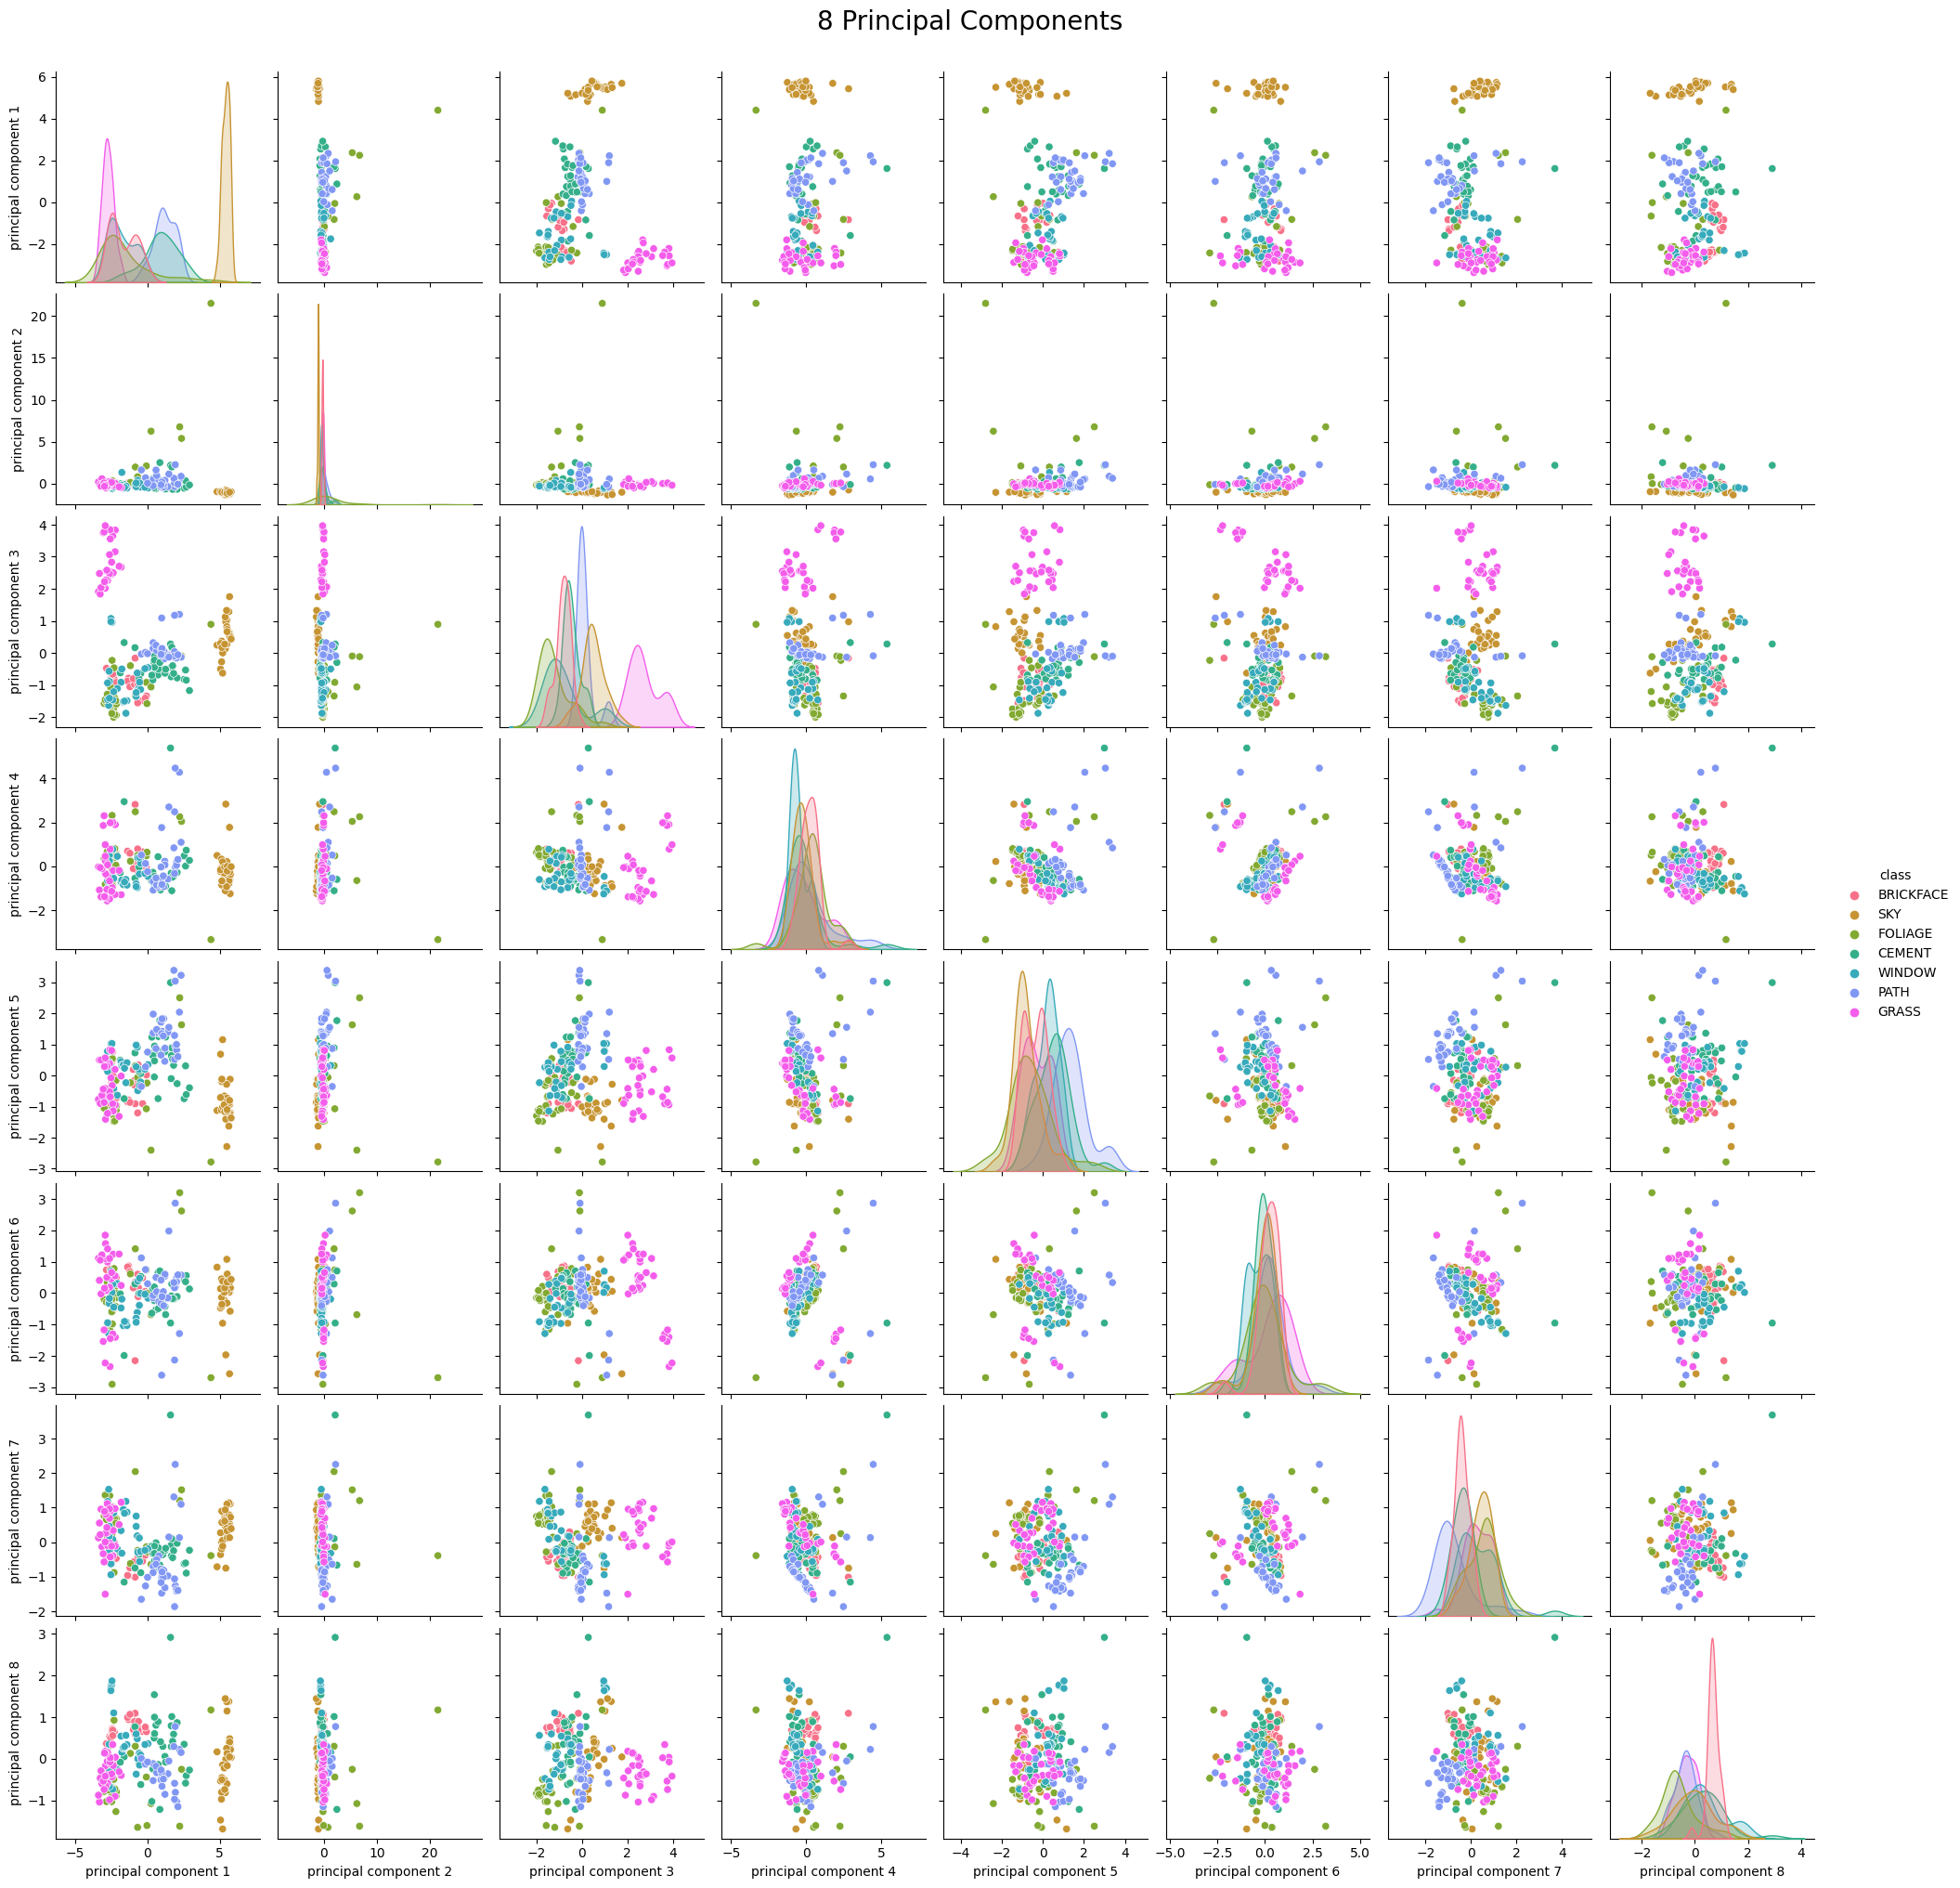

In [9]:
# Scatter Plot 2D

## mengatur Palet warna setiap class
Classes = ['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT', 'WINDOW', 'PATH', 'GRASS']
palette = sns.color_palette("husl", n_colors=len(Classes))

## Membuat matriks scatter plot 2D untuk delapan principal components
sns.pairplot(finalDf, hue='class', vars=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5',  'principal component 6',  'principal component 7',  'principal component 8'], palette=palette)
plt.suptitle('8 Principal Components', y=1.02, fontsize=20)
plt.show()

##Penjelasan
####pca.explained_variance_ratio_: pca adalah objek dari kelas PCA (Principal Component Analysis) yang telah di-fit ke data.

####explained_variance_ratio_ adalah atribut dari objek PCA yang memberikan rasio varians yang dijelaskan oleh setiap komponen utama. Dalam konteks ini, masing-masing nilai dalam array ini menyatakan seberapa besar varians yang dijelaskan oleh komponen utama tersebut terhadap total varians data.

####sum(pca.explained_variance_ratio_): Menghitung jumlah dari semua rasio varians yang dijelaskan oleh komponen utama. Ini memberikan gambaran tentang seberapa banyak varians yang dijelaskan oleh keseluruhan komponen utama yang dipertahankan.

####Output pertama adalah array yang berisi rasio varians yang dijelaskan oleh masing-masing komponen utama. Misalnya, nilai pertama (0.4247202) menyatakan bahwa sekitar 42.47% dari varians data dijelaskan oleh komponen utama pertama.
####Output kedua adalah jumlah total dari semua rasio varians. Dalam contoh ini, sekitar 93.46% dari varians data dijelaskan oleh lima komponen utama pertama.


In [8]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.4247202  0.17684638 0.10389054 0.0653622  0.0568857  0.04234748
 0.03429174 0.03028044]
0.9346246751356589


##Kesimpulan
####Kode di atas melakukan reduksi dimensi menggunakan PCA pada dataset.
####PCA menghasilkan delapan komponen utama (principal component 1 hingga principal component 8).
####Kode kemudian memvisualisasikan matriks scatter plot 2D untuk kedelapan komponen utama.
####Output dari PCA, seperti rasio varians yang dijelaskan, memberikan informasi tentang seberapa baik representasi dataset yang baru setelah pemrosesan PCA.
####Jumlah rasio varians yang dijelaskan memberikan gambaran tentang seberapa banyak informasi dari dataset yang dipertahankan setelah reduksi dimensi.


###Jadi, dengan menggunakan PCA, kita dapat mengurangi dimensi data sambil mempertahankan sebagian besar varians, sehingga memungkinkan analisis yang lebih efisien dan visualisasi yang lebih sederhana.